The dataset (published in 2023) encompasses many hotels in different cities and regions of Vietnam, including popular tourist destinations such as Hanoi, Ho Chi Minh City, Da Nang, Nha Trang, and more. The reviews cover a diverse spectrum of accommodation types, ranging from budget guesthouses to luxurious resorts, providing a comprehensive representation of the Vietnamese hospitality industry.

https://zenodo.org/records/7967494

In [133]:
# Import libraries
import pandas as pd
import scipy.stats as st
import numpy as np
import re
import contractions

# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

In [134]:
# Load dataset
df = pd.read_csv('input/Reviews.csv')
df.head()

,id,language,rating,additionalRatings,createdDate,helpfulVotes,username,userId,title,text,locationId,parentGeoId,hotelName,stayDate,tripType
0,654797953,vi,4,[],2019-02-25,1,Lephuchau,F31010A9913D4D5EF71C19943112119E,Một đêm khó ngủ,- Nằm ở số 4 Tôn Đức Thắng (trong khu villa ca...,14775963,651661,Hana Riverside Villa,2019-02-28,COUPLES
1,759960236,en,4,"[{'rating': 5, 'ratingLabel': 'Sự sạch sẽ'}, {...",2020-07-14,0,Lê T,5EEE52E4A46EB17EDB101F2687176104,Nice choice for short stay (hope the contructi...,"Hana Riverside Quang Ngai hotel, - Located in ...",14775963,651661,Hana Riverside Villa,2020-02-29,NONE
2,746020346,en,5,[],2020-02-18,0,Pipes79,9266F1E4EB6B7888598CAFA3CA535D94,Lovely stay,Dropped in here for 1 night on my way north. F...,14775963,651661,Hana Riverside Villa,2020-02-29,SOLO
3,710719324,en,4,[],2019-09-17,0,Chels2210,2930D0F21694986E614640B46EAC7FF6,Good room,Stayed here for one night while passing throug...,14775963,651661,Hana Riverside Villa,2019-09-30,COUPLES
4,658526310,vi,4,[],2019-03-14,0,Andy M,A1C68DD5908359E499974361DADF0117,Một công việc đang tiến triển - theo nghĩa đen.,"Khách sạn đẹp, nhân viên và các cơ sở nhưng cô...",14775963,651661,Hana Riverside Villa,2019-03-31,SOLO


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62887 entries, 0 to 62886
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 62887 non-null  int64 
 1   language           62887 non-null  object
 2   rating             62887 non-null  int64 
 3   additionalRatings  62887 non-null  object
 4   createdDate        62887 non-null  object
 5   helpfulVotes       62887 non-null  int64 
 6   username           62424 non-null  object
 7   userId             62432 non-null  object
 8   title              62885 non-null  object
 9   text               62887 non-null  object
 10  locationId         62887 non-null  int64 
 11  parentGeoId        62887 non-null  int64 
 12  hotelName          62887 non-null  object
 13  stayDate           62887 non-null  object
 14  tripType           62887 non-null  object
dtypes: int64(5), object(10)
memory usage: 7.2+ MB


## Converting data to correct format

In [136]:
# stay date to datetime format
df['stayDate'] = pd.to_datetime(df['stayDate'])
df['stayDate'].describe()

count                            62887
mean     2018-01-28 03:30:48.057627136
min                2005-03-31 00:00:00
25%                2016-06-30 00:00:00
50%                2018-06-30 00:00:00
75%                2019-10-31 00:00:00
max                2022-10-31 00:00:00
Name: stayDate, dtype: object

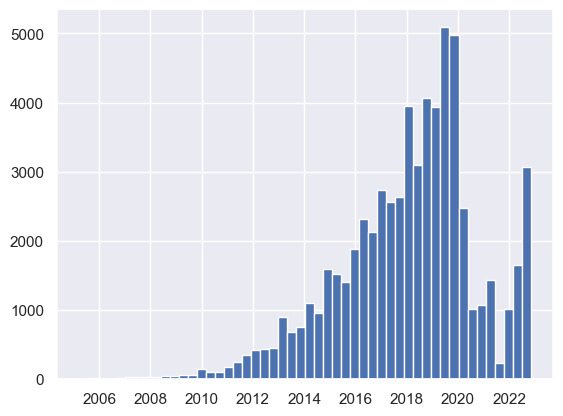

In [137]:
# stay date histogram - Covid gap and bounce back
df['stayDate'].hist(bins = 50)
plt.show()

In [138]:
# created date to datetime format
df['createdDate'] = pd.to_datetime(df['createdDate'])
df['createdDate'].describe()

count                            62887
mean     2018-02-02 16:40:58.352282368
min                2005-06-01 00:00:00
25%                2016-07-24 00:00:00
50%                2018-07-01 00:00:00
75%                2019-10-19 00:00:00
max                2022-10-10 00:00:00
Name: createdDate, dtype: object

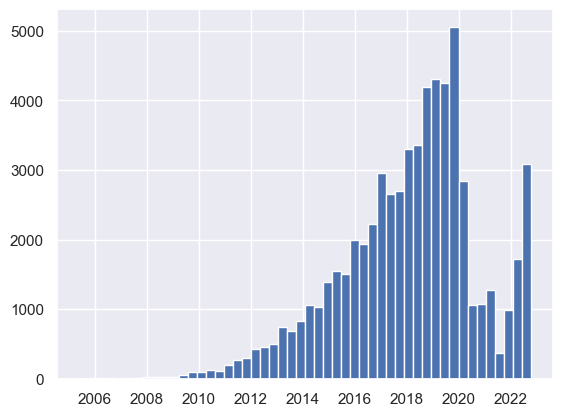

In [139]:
# create date histogram - Covid gap and bounce back
df['createdDate'].hist(bins = 50)
plt.show()

## Helpful Votes

In [140]:
# Descriptives for numeric values
df[['rating', 'helpfulVotes']].describe()

,rating,helpfulVotes
count,62887.000000,62887.000000
mean,4.504301,0.939844
std,0.957503,2.302358
min,1.000000,-1.000000
25%,4.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,1.000000
max,5.000000,212.000000


In [143]:
no_votes = len(df[df['helpfulVotes'] < 1])
print("Number of reviews without helpfulVotes:", no_votes, 
      "- out of total", round(no_votes * 100/len(df), 2), "%")

low_votes = len(df[(df['helpfulVotes'] > 0) & (df['helpfulVotes'] < 5)])
print("Number of reviews with 1-5 helpfulVotes:", low_votes, 
      "- out of total", round(low_votes * 100/len(df), 2), "%")

# Outlier
df[df['helpfulVotes'] == -1]

Number of reviews without helpfulVotes: 35667 - out of total 56.72 %
Number of reviews with 1-5 helpfulVotes: 25154 - out of total 40.0 %


,id,language,rating,additionalRatings,createdDate,helpfulVotes,username,userId,title,text,locationId,parentGeoId,hotelName,stayDate,tripType
47934,785581661,en,5,"[{'rating': 5, 'ratingLabel': 'Sự sạch sẽ'}, {...",2021-03-31,-1,nhmymy,8D7AC5B37B42593B65BC20E257961B62,Peaceful Paradise in Cam Ranh,We went there for 4 nights and all were excell...,10587972,18928520,The Anam,2021-03-31,NONE


## Languages

In [144]:
# Number of reviews by language
df[['language','id']].groupby(by=['language']).count().sort_values('id', ascending=False)

,id
language,
en,32449
vi,15364
fr,4457
de,2577
ko,2282
ru,1944
nl,979
ja,818
it,694


## English only reviews

In [145]:
# Create a dataframe with English language reviews
df_en = df[df.language == 'en']
# Keep only columns with useful information
columns = ['createdDate', 'stayDate', 'hotelName', 'rating', 'helpfulVotes', 
        'text', 'tripType', 'locationId', 'parentGeoId']
df_en = df_en.reset_index(drop=True)
df_en = df_en[columns]

print('Number of English language reviews:', len(df_en))
df_en.head()

Number of English language reviews: 32449


,createdDate,stayDate,hotelName,rating,helpfulVotes,text,tripType,locationId,parentGeoId
0,2020-07-14,2020-02-29,Hana Riverside Villa,4,0,"Hana Riverside Quang Ngai hotel, - Located in ...",NONE,14775963,651661
1,2020-02-18,2020-02-29,Hana Riverside Villa,5,0,Dropped in here for 1 night on my way north. F...,SOLO,14775963,651661
2,2019-09-17,2019-09-30,Hana Riverside Villa,4,0,Stayed here for one night while passing throug...,COUPLES,14775963,651661
3,2018-10-04,2018-09-30,Hana Riverside Villa,5,0,Kinda difficult to find but we had a great sta...,COUPLES,14775963,651661
4,2020-03-10,2020-03-31,Cocoland River Beach Resort & Spa,1,1,Don’t go to this place. The manager is a liar....,COUPLES,17793639,651661


In [146]:
# Geo ID's can be mapped to identify hotel locations
geo_df = pd.read_csv('input/hotel_coordinate.csv')
geo_df.head()

,locationId,name,latitude,longitude,parentGeo,parentGeoId
0,12236581,Thanh Lich Guesthouse,15.141978,108.799225,Quảng Ngãi,651661
1,3197121,Dlgl - Dung Quat Hotel,15.366772,108.731500,Quảng Ngãi,651661
2,8467294,Cam Thanh Hotel,15.124477,108.809204,Quảng Ngãi,651661
3,17793639,Cocoland River Beach Resort & Spa,15.095693,108.894570,Quảng Ngãi,651661
4,14775963,Hana Riverside Villa,15.129846,108.784210,Quảng Ngãi,651661


In [147]:
# Join review and geo tables to add parentGeo (locale) information
df_en = df_en.merge(geo_df, on=['locationId', 'parentGeoId'], how='left')
df_en = df_en[['createdDate', 'stayDate', 'hotelName', 'rating', 'helpfulVotes',
       'text', 'tripType','parentGeo']]
df_en.head()

,createdDate,stayDate,hotelName,rating,helpfulVotes,text,tripType,parentGeo
0,2020-07-14,2020-02-29,Hana Riverside Villa,4,0,"Hana Riverside Quang Ngai hotel, - Located in ...",NONE,Quảng Ngãi
1,2020-02-18,2020-02-29,Hana Riverside Villa,5,0,Dropped in here for 1 night on my way north. F...,SOLO,Quảng Ngãi
2,2019-09-17,2019-09-30,Hana Riverside Villa,4,0,Stayed here for one night while passing throug...,COUPLES,Quảng Ngãi
3,2018-10-04,2018-09-30,Hana Riverside Villa,5,0,Kinda difficult to find but we had a great sta...,COUPLES,Quảng Ngãi
4,2020-03-10,2020-03-31,Cocoland River Beach Resort & Spa,1,1,Don’t go to this place. The manager is a liar....,COUPLES,Quảng Ngãi


## Numeric values

In [148]:
# Descriptives for numeric values in English reviews
df_en[['rating', 'helpfulVotes', 'createdDate', 'stayDate']].describe()

,rating,helpfulVotes,createdDate,stayDate
count,32449.000000,32449.000000,32449,32449
mean,4.507597,1.135412,2017-06-03 05:22:34.728959232,2017-05-27 18:13:27.445529856
min,1.000000,-1.000000,2005-06-01 00:00:00,2005-03-31 00:00:00
25%,4.000000,0.000000,2015-08-13 00:00:00,2015-07-31 00:00:00
50%,5.000000,1.000000,2017-07-24 00:00:00,2017-07-31 00:00:00
75%,5.000000,2.000000,2019-05-17 00:00:00,2019-05-31 00:00:00
max,5.000000,105.000000,2022-10-10 00:00:00,2022-10-31 00:00:00
std,0.940054,2.158127,NaN,NaN


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


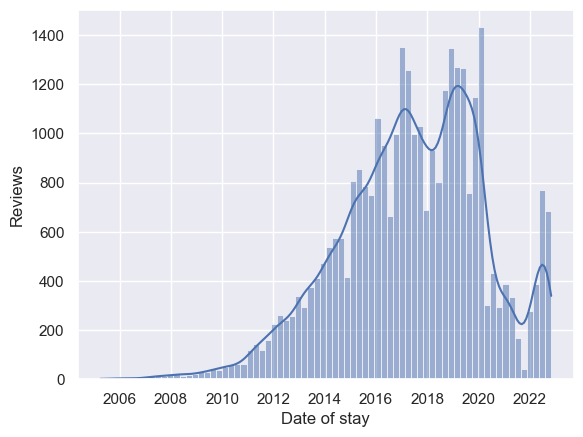

In [149]:
# Histogram for stayDate
sns.histplot(df_en["stayDate"], kde=True)
plt.xlabel('Date of stay')
plt.ylabel('Reviews')
plt.show()

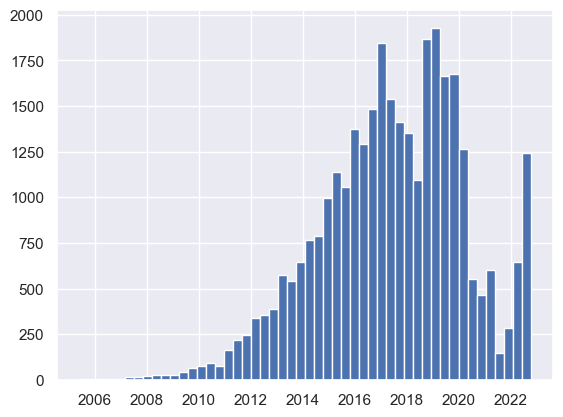

In [150]:
# Histogram for createdDate
df_en['createdDate'].hist(bins = 50)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


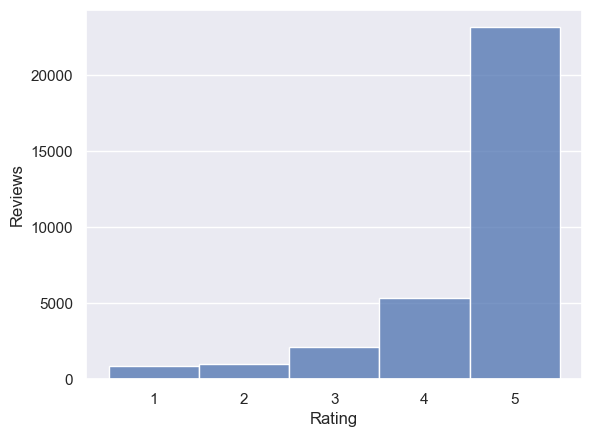

In [151]:
# Histogram for rating
sns.histplot(df_en["rating"], bins = 5, discrete = True)
plt.grid(axis='x')
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.show()

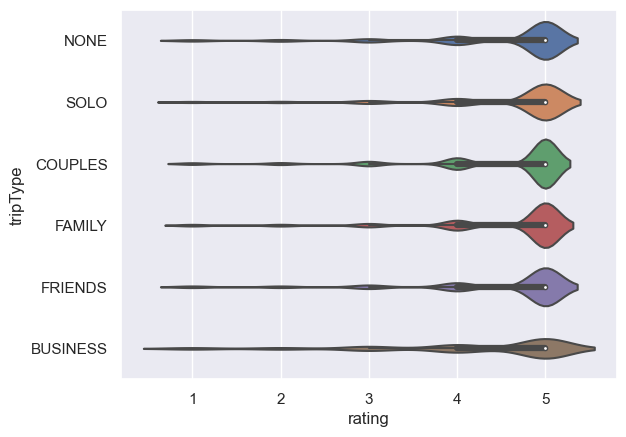

In [152]:
# Violin plot for rating by trip type
sns.violinplot(data=df_en, x="rating", y="tripType")
plt.show()

In [155]:
# Function calulates confidence interval (by default at 95% level)
# Input: array of numeric values, confidence level float with value between 0 and 1(optional)
# Output: prints mean value, confidence interval and min / max boundry values
def conf_interval(array, conf_level = 0.95):
    ci_scale = st.t.interval(confidence = conf_level, 
                  df = len(array) - 1, 
                  loc = np.mean(array),  
                  scale = st.sem(array))
    print('Confidence interval with 0.95% conf level:', round(np.mean(array),2), ' +/-', round(np.mean(array) - ci_scale[0],2))
    print('Min:' + str(round(ci_scale[0], 2)), '; Max:', round(ci_scale[1],2) )

In [156]:
conf_interval(df_en["rating"])

Confidence interval with 0.95% conf level: 4.51  +/- 0.01
Min:4.5 ; Max: 4.52


Number of reviews that don't have helpful vote: 15556


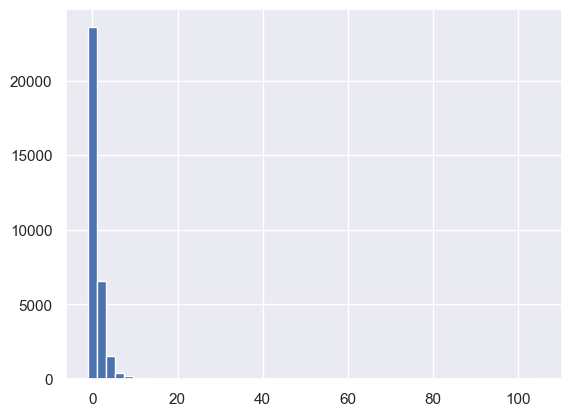

In [159]:
print("Number of reviews that don't have helpful vote:",len(df_en[df_en['helpfulVotes'] < 1]))
# Histogram for helpful votes
df_en['helpfulVotes'].hist(bins = 50)
plt.show()

## Hotels

In [172]:
# Dataframe of hotels and count of reviews
hotel_df = df_en[['hotelName','text']].groupby(by=['hotelName']).count().sort_values(['text'], ascending=False)
hotel_df = hotel_df.rename(columns={"text": "reviews"})

no_hotels = len(hotel_df)
print("Number of hotels with reviews in English:", no_hotels)
print("Reviews per hotel", round(len(df_en)/no_hotels,2))
hotel_df.head(20)

Number of hotels with reviews in English: 946
Reviews per hotel 34.3


,reviews
hotelName,
Khách sạn Nam Hải Hội An,1924
Angsana Lang Co Vietnam,1304
Banyan Tree Lang Co,1270
Phong Nha Farmstay,1208
Six Senses Ninh Van Bay,975
Khu Nghỉ Dưỡng Chen Sea & Spa,868
The Anam,771
JW Marriott Phu Quoc Emerald Bay Resort & Spa,759
Khu Nghỉ Dưỡng Fusion Resort Phú Quốc,729


In [164]:
# Descriptives for reviews
hotel_df.describe()

,reviews
count,946.000000
mean,34.301268
std,129.722321
min,1.000000
25%,1.000000
50%,3.000000
75%,14.000000
max,1924.000000


In [165]:
conf_interval(hotel_df["reviews"])

Confidence interval with 0.95% conf level: 34.3  +/- 8.28
Min:26.02 ; Max: 42.58


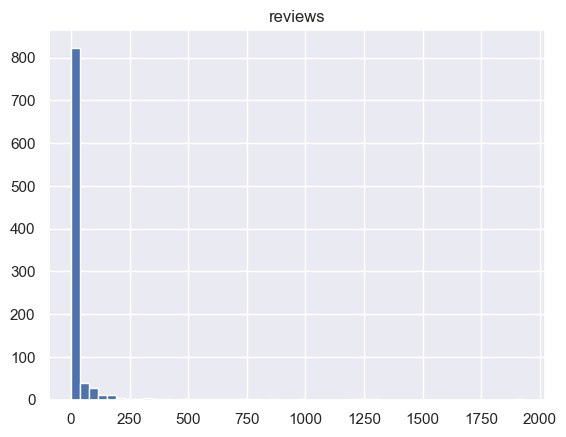

In [166]:
# Histogram for number of reviews by hotel
hotel_df.hist(bins = 50)
plt.show()

## Location

In [176]:
locale_df = df_en[['parentGeo','text']].groupby(by=['parentGeo']).count().sort_values(['text'], ascending=False)
locale_df = locale_df.rename(columns={"text": "reviews"})
print('Number of unique locales:', len(locale_df))
print("Reviews per locale", round(len(df_en)/len(locale_df),2))
print("Hotels per location", round(len(hotel_df)/len(locale_df),2))
locale_df.head(20)

Number of unique locales: 161
Reviews per locale 201.55
Hotels per location 5.88


,reviews
parentGeo,
Đảo Phú Quốc,6917
Vườn quốc gia Phong Nha-Kẻ Bàng,2666
Cu Du,2585
Ninh Vân,2005
Điện Bàn,1946
Cam Hải Đông,1328
Thuan An,1197
Nam Cát Tiên,711
Hồ Tràm,699


In [174]:
# Descriptives for reviews
locale_df.describe()

,reviews
count,161.000000
mean,191.279503
std,665.595534
min,1.000000
25%,3.000000
50%,24.000000
75%,112.000000
max,6917.000000


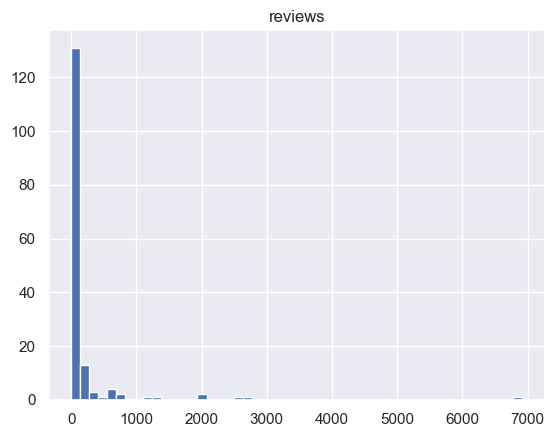

In [175]:
# Histogram for number of reviews by locale
locale_df.hist(bins = 50)
plt.show()

## Trip type

In [179]:
# Number of reviews by trip type
df_en[['tripType','text']].groupby(by=['tripType']).count().sort_values(['text'], ascending=False).head(20)

,text
tripType,
COUPLES,13153
FAMILY,7576
FRIENDS,4501
NONE,4105
SOLO,2054
BUSINESS,1060


In [181]:
# Hotels by trip type
trip_type_hotel_df = df_en[['tripType','createdDate', 'hotelName']].groupby(by=['tripType', 'hotelName']).count() #.sort_values(['createdDate'], ascending=False).head(20)
trip_type_hotel_df.head()

createdDate
tripType hotelName                                
BUSINESS Alma Resort Cam Ranh                    2
         Amanoi                                  7
         An Hoa Residence                        2
         An Lam Retreats Ninh Van Bay            4
         An Lâm Retreats Saigon River           20

In [126]:
# Export list of hotels by trip type
trip_type_hotel_df.to_csv("output/en_trip_type_hotel.csv", index = True, header = True)

## Reviews example

In [182]:
for review in df_en.text[:5]:
    print("\n", review)


 Hana Riverside Quang Ngai hotel, - Located in a quiet villa area and near the river so very cool. 4 km from the city center. - Clean and spacious rooms, friendly staff. A favorite destination for tourists by motorbike. - The hotel is under construction, so the outside railing is very dusty. We could not sleep well at night because the dog next door barked loudly.

 Dropped in here for 1 night on my way north. Friendly helpful staff and clean spacious room. Some great seafood located on the street within walking distance. Highly Recommend for a couple of nights or so.

 Stayed here for one night while passing through. The room was clean and tidy and had a kettle and fridge which was good. Nice clean modern bathroom. It wasn't in the best location for us to find something for dinner if you're after anything other than standard local food. The bed was comfy, our main issue was just that we got repeatedly woken up all night by a dog barking very close by and was allowed to continue barki

## Export of English language reviews

In [183]:
# Light preprocessing: removing contractions and special characters besides .,!?
df_en['text_n'] = df_en.text.apply(lambda x: contractions.fix(x))
df_en['text_n'] = df_en.text_n.apply(lambda x: re.sub('[^A-Za-z0-9.!?]+', ' ',x))

df_en.head()

,createdDate,stayDate,hotelName,rating,helpfulVotes,text,tripType,parentGeo,text_n
0,2020-07-14,2020-02-29,Hana Riverside Villa,4,0,"Hana Riverside Quang Ngai hotel, - Located in ...",NONE,Quảng Ngãi,Hana Riverside Quang Ngai hotel Located in a q...
1,2020-02-18,2020-02-29,Hana Riverside Villa,5,0,Dropped in here for 1 night on my way north. F...,SOLO,Quảng Ngãi,Dropped in here for 1 night on my way north. F...
2,2019-09-17,2019-09-30,Hana Riverside Villa,4,0,Stayed here for one night while passing throug...,COUPLES,Quảng Ngãi,Stayed here for one night while passing throug...
3,2018-10-04,2018-09-30,Hana Riverside Villa,5,0,Kinda difficult to find but we had a great sta...,COUPLES,Quảng Ngãi,Kind Of difficult to find but we had a great s...
4,2020-03-10,2020-03-31,Cocoland River Beach Resort & Spa,1,1,Don’t go to this place. The manager is a liar....,COUPLES,Quảng Ngãi,Do not go to this place. The manager is a liar...


In [184]:
# Exporting file for NLP
df_en.to_csv("Dataset/Vietnam/english_reviews_v2.csv", index = False, header = True)